In [48]:
# 1. 라이브러리 임포트
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [49]:
# 2. 데이터셋 및 데이터로더 설정
batch_size = 256

train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

In [50]:
# 3. MLP 모델 정의 (ModuleList 이용, 은닉층 수 조절 가능)
class MLP(nn.Module):
    def __init__(self, num_hidden_layers):
        super().__init__()
        self.in_dim = 28 * 28
        self.out_dim = 10

        dims = [self.in_dim, 512, 256, 128, 64, self.out_dim]
        self.linears = nn.ModuleList([
            nn.Linear(dims[i], dims[i + 1]) for i in range(len(dims) - 1)
        ])
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, self.in_dim)
        for layer in self.linears[:-1]:
            x = self.relu(layer(x))
        return self.linears[-1](x)

In [51]:
def train(model, loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    total = 0

    for images, labels in loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        total += images.size(0)

    return running_loss / total


In [52]:
# 5. 평가 함수
def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    return correct / total

In [53]:
accuracies = []
layers = [2, 3, 4, 5]

for num_layers in layers:
    print(f"\nTraining {num_layers} number of layers")
    model = MLP(num_layers)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(3):
        epoch_loss = train(model, train_loader, optimizer, criterion)
        print(f"Epoch {epoch+1:2d} | Loss: {epoch_loss:.4f}")

    acc = evaluate(model, test_loader)
    accuracies.append(acc)
    print(f"Layers: {num_layers}, Accuracy: {acc:.4f}")



Training 2 number of layers
Epoch  1 | Loss: 0.4774
Epoch  2 | Loss: 0.1523
Epoch  3 | Loss: 0.1004
Layers: 2, Accuracy: 0.9710

Training 3 number of layers
Epoch  1 | Loss: 0.4618
Epoch  2 | Loss: 0.1483
Epoch  3 | Loss: 0.0983
Layers: 3, Accuracy: 0.9726

Training 4 number of layers
Epoch  1 | Loss: 0.4718
Epoch  2 | Loss: 0.1433
Epoch  3 | Loss: 0.0963
Layers: 4, Accuracy: 0.9699

Training 5 number of layers
Epoch  1 | Loss: 0.4578
Epoch  2 | Loss: 0.1487
Epoch  3 | Loss: 0.0969
Layers: 5, Accuracy: 0.9627


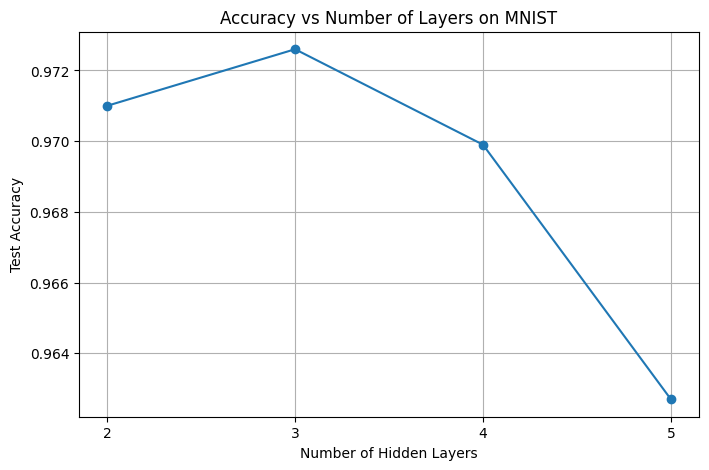

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(layers, accuracies, marker='o')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Test Accuracy')
plt.title('Accuracy vs Number of Layers on MNIST')
plt.xticks(layers)
plt.grid(True)
plt.show()
